# 와인 품질 분류 경진대회 베이스라인

이번 대회는 와인에 함유된 화학 성분을 바탕으로 와인의 품질을 분류하는 대회입니다.

간단한 모델을 작성해서 성능을 확인하고, 성능을 개선하기 위해서는 어떻게 접근해야 하는지 생각해봅시다!

그럼 시작해볼까요?

# 데이터 불러오기 + 살펴보기

먼저 분석하려는 데이터를 작업장으로 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를 편하게 다루도록 해주는 라이브러리입니다.

데이터 분석에는 반드시 사용된다고 해도 과언이 아닌 라이브러리이니, 시간이 날때마다 공부해둡시다.

In [81]:
import pandas as pd

# csv 형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv('dataset/train.csv')

train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


출력된 데이터의 모양을 살펴보면 총 14개의 열(column)이 존재하는 것을 확인할 수 있습니다.

['id', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type', 'quality']

각각의 column이 의미하는 것은 대회 페이지의 [데이터] 탭의 상세 설명을 살펴봅시다.

## 데이터 전처리

데이터를 살펴보니 "type" column의 값이 ["white", "red"] 와 같이 문자열 형태로 이루어져 있는 것을 확인할 수 있습니다.

하지만 컴퓨터는 숫자만을 인식할 수 있기 때문에, 문자열로 이루어진 값을 숫자로 바꾸어주어야 합니다. 

여기서는 간단하게 "white"를 0 으로, "red"를 1 로 변환해보도록 하겠습니다.

In [82]:
word_to_num = {"white":0, "red":1}

train['type'] = train['type'].replace(word_to_num)
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


# 변수 및 모델 정의

우리의 목적은 주어진 와인의 화학적 성분을 이용하여 와인의 품질, 맛 평점이 몇점인지를 예측하는 것입니다.

그럼 화학 성분 데이터가 X, 와인 품질이 y가 되겠죠?

In [83]:
# 분석에 필요 없는 id 와 예측하고자 하는 값 quality를 제거해줍니다.
X = train.drop(['id', 'quality'], axis=1)
y = train['quality']

정형데이터에서 가장 익숙한 Linear Regression을 진행해보도록 하겠습니다.

그런데 여기서는 예측하고자 하는 것이 연속적인 값을 갖는 수치 형태가 아닌, 1 단위로 끊어지는 평점으로 분류하는 문제이기 때문에

category를 분류할 때 사용하는 LogisticRegression을 이용하여 진행하도록 하겠습니다.

LogisticRegression에 대한 자세한 설명은 [이 위키피디아](https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80)를 참조해주세요.

In [84]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X, y)

LogisticRegression(solver='liblinear')

# 모델 성능 확인

굉장히 간단하게 학습이 끝났습니다.

이제 이 모델이 실제로 데이터를 얼마나 잘 맞추는지 확인해볼까요?

In [85]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [86]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(X)

score = ACCURACY(y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 54.19% 입니다


생각보다 낮은 점수를 받았습니다... 😥

대체 무엇이 문제일까요?

예측 결과를 분석해서 이 모델이 어떤 부분에 취약한지 찾아봅시다.

In [87]:
from collections import Counter

pred_cnt = Counter(prediction)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {pred_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개")

4 값 예측 개수: 0개, 실제 값 개수: 108개
5 값 예측 개수: 1085개, 실제 값 개수: 1069개
6 값 예측 개수: 2056개, 실제 값 개수: 1418개
7 값 예측 개수: 90개, 실제 값 개수: 539개
8 값 예측 개수: 0개, 실제 값 개수: 97개


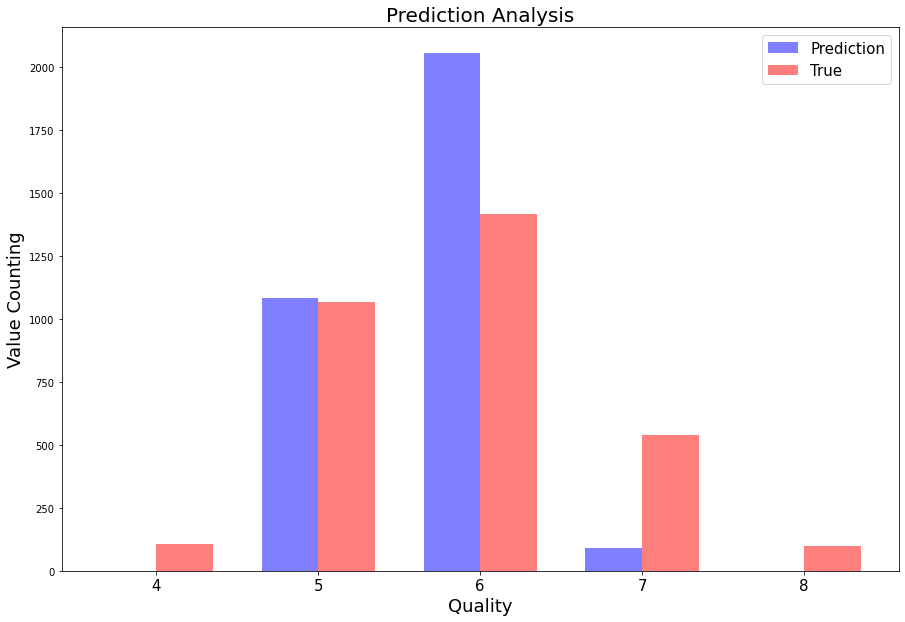

In [88]:
import matplotlib.pyplot as plt

index = sorted(true_cnt.keys())
pred_val = [pred_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], pred_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

가장 먼저 눈에 띄는 건 4와 8을 하나도 예측하지 않았다는 점이네요.

그리고 중간 값인 6을 굉장히 많이 예측한 모습을 확인할 수 있습니다.

5를 보니 예측값과 실제값의 개수가 비슷하네요. 그럼 이 모델은 5에 대해서는 잘 예측했다고 할 수 있을까요?



### 아니요! 그렇지 않습니다! 

이 분석만으로는 정확한 정확도를 평가하기 힘듭니다. 잘못 예측한 결과까지 포함했기 때문입니다.

이 분석에서 알 수 있는 것은 이 모델이 6을 매우 좋아하고 4와 8을 아주 싫어한다는 것뿐입니다.

이번엔 정답을 예측한 결과를 바탕으로 이 모델의 정확도를 분석해보겠습니다.

In [89]:
accurate = y[y==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  1751
4 값 예측 개수: 0개, 실제 값 개수: 108개, 정답률: 0.00%
5 값 예측 개수: 640개, 실제 값 개수: 1069개, 정답률: 59.87%
6 값 예측 개수: 1060개, 실제 값 개수: 1418개, 정답률: 74.75%
7 값 예측 개수: 51개, 실제 값 개수: 539개, 정답률: 9.46%
8 값 예측 개수: 0개, 실제 값 개수: 97개, 정답률: 0.00%


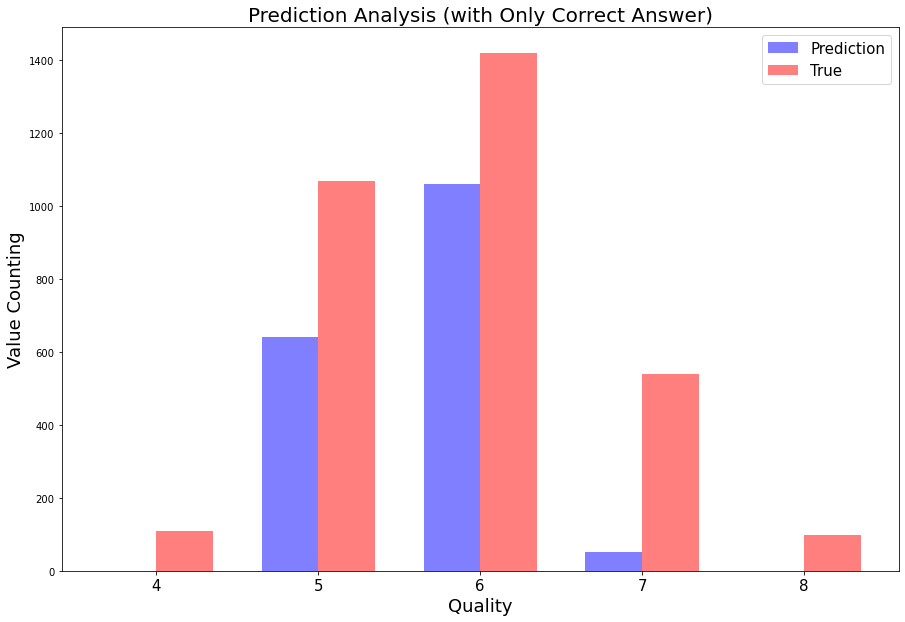

In [90]:
index = sorted(true_cnt.keys())
accu_val = [accu_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], accu_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis (with Only Correct Answer)', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

정답률을 살펴보니 5에 대해서 56% 정도의 정답률을 보여주네요.

위에서 예상한 것과는 다르게 5에 대해서도 별로 좋은 성능을 내지 못하고 있는 것 같습니다.

모델의 약점을 보완하고 성능을 끌어올리기 위해서는 어떤 방법을 사용할 수 있을까요?

여러분의 생각을 코드 공유 게시판에 공유해주세요!


# 예측 값 생성 및 제출하기

학습한 모델을 사용하여 예측값을 생성하고 대회에 제출해보겠습니다.

In [91]:
test = pd.read_csv('dataset/test.csv')
word_to_num = {"white":0, "red":1}

test['type'] = test['type'].replace(word_to_num)

prediction = model.predict(test.drop('id', axis=1))
prediction

array([6, 5, 5, ..., 5, 6, 6])

이제 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [94]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('dataset/sample_submission.csv')
submission['quality'] = prediction
submission

,id,quality
0,1,6
1,2,5
2,3,5
3,4,6
4,5,5
...,...,...
3226,3227,5
3227,3228,6
3228,3229,5
3229,3230,6


In [95]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)

이렇게 생성된 submission.csv 파일을 데이콘 대회 페이지에 업로드 & 제출하여 결과를 확인해보세요!

문제를 해결하기 위한 여러분의 방법을 코드 공유 게시판에 공유해주세요

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!